In [8]:
import pandas as pd
import numpy as np

In [9]:
df1 = pd.read_csv('entrenar_sc_1820.csv')
df2 = pd.read_csv('entrenar_sc_1921.csv')
df3 = pd.read_csv('entrenar_sc_2022.csv')
df4 = pd.read_csv('entrenar_sc_2123.csv')
archivos = [df1,df2,df3,df4]

In [10]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [8]:
def buscar_parametros_xgboost_sc(colsampleT,learnR,depthM,estimators):
    xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
            colsample_bytree = colsampleT, learning_rate = learnR,
            max_depth = depthM, n_estimators = estimators) 
    
    suma_errores = 0
    for df in archivos:
        X,y = df.drop(['ref_hash','segundos'],axis=1),df['segundos']
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=150)

        xg_reg.fit(X_train,y_train)
        preds = xg_reg.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        suma_errores += rmse
       
    error_promedio = suma_errores / len(archivos)
    print('RMSE promedio: %f' % (error_promedio))
    return (error_promedio)

In [9]:
colsampleT = 0.5
learnR = 0.1
depthM = 5
estimators = 10
errores = []
for v in [0.1,0.3,0.5,0.9]:
    colsampleT = v
    print('Colsample_bytree: %f'% (v))
    error = buscar_parametros_xgboost_sc(colsampleT,learnR,depthM,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Colsample_bytree: 0.100000
RMSE promedio: 96622.484741
Colsample_bytree: 0.300000
RMSE promedio: 93119.331399
Colsample_bytree: 0.500000
RMSE promedio: 92809.796866
Colsample_bytree: 0.900000
RMSE promedio: 92810.478128
Error minimo 92809.796866 con valor 0.500000


In [10]:
colsampleT = 0.5
learnR = 0.1
depthM = 5
estimators = 10
errores = []
for v in [0.1,0.3,0.4,0.5,0.6,0.7]:
    learnR = v
    print('Learning_rate: %f'% (v))
    error = buscar_parametros_xgboost_sc(colsampleT,learnR,depthM,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Learning_rate: 0.100000
RMSE promedio: 92809.796866
Learning_rate: 0.300000
RMSE promedio: 54519.553346
Learning_rate: 0.400000
RMSE promedio: 54213.093611
Learning_rate: 0.500000
RMSE promedio: 54207.618457
Learning_rate: 0.600000
RMSE promedio: 54210.418594
Learning_rate: 0.700000
RMSE promedio: 54225.923698
Error minimo 54207.618457 con valor 0.500000


In [11]:
colsampleT = 0.5
learnR = 0.5
depthM = 5
estimators = 10
errores = []
for v in [2,3,4,5,6,8]:
    depthM = v
    print('Depth: %f'% (v))
    error = buscar_parametros_xgboost_sc(colsampleT,learnR,depthM,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Depth: 2.000000
RMSE promedio: 54321.569188
Depth: 3.000000
RMSE promedio: 54198.674316
Depth: 4.000000
RMSE promedio: 54201.981756
Depth: 5.000000
RMSE promedio: 54207.618457
Depth: 6.000000
RMSE promedio: 54220.494032
Depth: 8.000000
RMSE promedio: 54251.412399
Error minimo 54198.674316 con valor 3.000000


In [16]:
colsampleT = 0.5
learnR = 0.5
depthM = 3
estimators = 10
errores = []
for v in [8,9,10,12,20]:
    estimators = v
    print('Estimators: %f'% (v))
    error = buscar_parametros_xgboost_sc(colsampleT,learnR,depthM,estimators)
    errores.append([error,v])
error,v = min(errores,key=lambda x: x[0])
print('Error minimo %f con valor %f' %(error,v))

Estimators: 8.000000
RMSE promedio: 54202.902625
Estimators: 9.000000
RMSE promedio: 54198.886051
Estimators: 10.000000
RMSE promedio: 54198.674316
Estimators: 12.000000
RMSE promedio: 54199.164600
Estimators: 20.000000
RMSE promedio: 54201.011242
Error minimo 54198.674316 con valor 10.000000


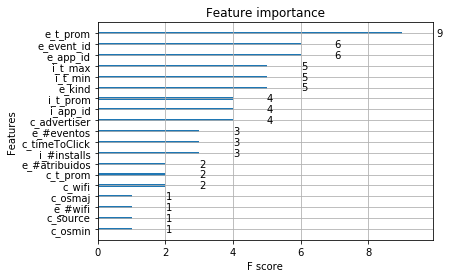

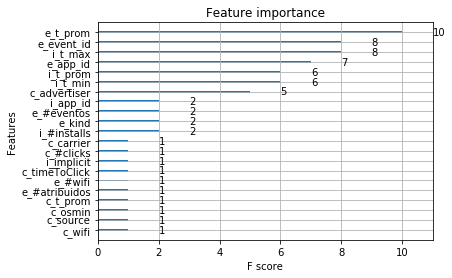

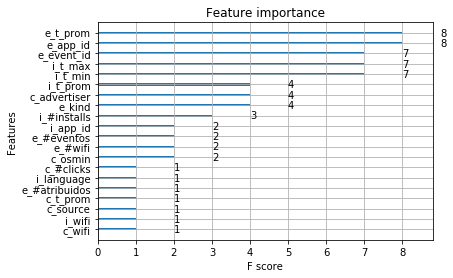

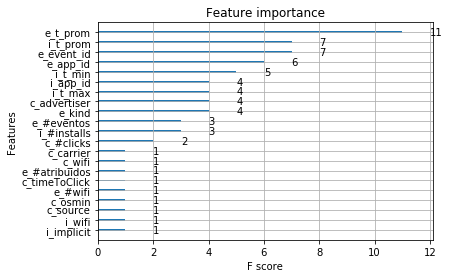

In [20]:
for df in archivos:
    X,y = df.drop(['ref_hash','segundos'],axis=1),df['segundos']
    data_dmatrix = xgb.DMatrix(data=X,label=y)
    params = {"objective":"reg:linear",'colsample_bytree': 0.5,
              'learning_rate': 0.5, 'max_depth': 3, 'alpha': 10}
    xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
    xgb.plot_importance(xg_reg)

In [11]:
predecir = pd.read_csv('predecir_sc_2426.csv')
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
            colsample_bytree = 0.5, learning_rate = 0.5,
            max_depth = 3,  n_estimators = 10) 
    
for df in archivos:
    X,y = df.drop(['ref_hash','segundos'],axis=1),df['segundos']
    xg_reg.fit(X,y)
preds = xg_reg.predict(predecir.drop(['ref_hash','segundos'],axis=1))
prediccion = pd.DataFrame(preds)
prediccion.columns = ['objetivo']
prediccion.head()

,objetivo
0,245021.937500
1,242916.953125
2,256530.015625
3,247576.328125
4,247917.562500


In [12]:
print(predecir.shape)
print(prediccion.shape)

(249470, 36)
(249470, 1)


In [13]:
prediccion = pd.DataFrame({'ref_hash': predecir['ref_hash'],
                           'obj': prediccion['objetivo']})
prediccion.head()

,obj,ref_hash
0,245021.937500,41863526108385
1,242916.953125,69039685746313
2,256530.015625,90072729247980
3,247576.328125,161514654074162
4,247917.562500,168103949904656


In [14]:
prediccion.to_csv('prediccion_sc_2426.csv', index=False)

In [15]:
prediccion

,obj,ref_hash
0,245021.937500,41863526108385
1,242916.953125,69039685746313
2,256530.015625,90072729247980
3,247576.328125,161514654074162
4,247917.562500,168103949904656
5,247525.468750,186034136943920
6,253062.640625,342614246084071
7,254675.906250,347785260789835
8,243322.265625,365882020742330
9,256081.421875,420449720220692
